In [309]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [310]:
month = 'April'

In [311]:
# Read original CSV data
#filename = "E:/Work/DS/Programming/vehicle_" + month +".csv"
filename = "E:/Work/DS/Programming/vehicle.csv"
vehicledf = pd.read_csv(filename)

In [312]:
GATENAME = {5: 'วิศวกรรมศาสตร์',
 30: 'แยก อมช',
 34: 'แยกบริหาร',
 4: 'เกษตรศาสตร์',
 33: 'วงเวียนหอนาฬิกา',
 1: 'หน้ามหาวิทยาลัย',
 27: 'วงเวียนสนามเทนนิส',
 25: 'วงเวียนมนุษย์',
 32: 'แยกโรงอาหารใหม่',
 41: 'สวนดอกพาร์ค',
 23: 'วงเวียน SCB',
 24: 'วงเวียนอ่างตาดชมพู',
 36: 'วิศวกรรมศาสตร์ใหม่',
 3: 'คันคลองชลประทาน',
 22: 'แยกอ่างแก้ว',
 26: 'แยกประตูไผ่ล้อม',
 2: 'ไผ่ล้อม',
 29: 'ลานจอดรถ อมช',
 31: 'ลานจอดรถฝายหิน',
 42: 'POC-ENG-in',
 20: 'แยกตึกอธิการบดี',
 18: 'ศึกษาศาสตร์',
 38: 'ลานจอดรถ  S1',
 19: 'ปตท.ใหม่',
 35: 'ลานจอดรถไร่ฟอร์ด',
 28: 'ลานจอดรถหอ 40 ปี',
 21: 'ลานจอดรถหน้ามอ',
 40: 'จอดรถโรงอาหารกลาง',
 37: 'อาคารสำนักงาน 3',
 39: 'ข่วงพยอม'}

In [313]:
vehicledf.head()

,Unnamed: 0,plate_number,type,is_registered,direction,gate_id,month,day,hour,min,sec
0,0,1กง2501,motorcycle,True,o,5,March,7,16,18,11
1,1,กง7559,car,False,o,30,March,7,16,18,10
2,2,กพพ815,motorcycle,False,o,34,March,7,16,18,10
3,3,5กณ4065,car,False,o,4,March,7,16,18,8
4,4,ขค6235,car,True,o,33,March,7,16,18,10


# Data Cleaning and Encoding

Get rid of some unnecessary columns and encode features:

In [314]:
def clean(df):
    return df.drop(columns = ['Unnamed: 0','month'])
def encode(df):
    df['plate_number'] = df['plate_number'].astype('category').cat.codes
    #df['type'] = df['type'].astype('category').cat.codes # 0 as car 1 as motorcycle
    #df['is_registered'] = df['is_registered'].astype('category').cat.codes # 0 as false 1 as true
    #df['direction'] = df['direction'].astype('category').cat.codes # 0 as i 1 as o


In [315]:
df = clean(vehicledf)
encode(df)

In [316]:
df.head()

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,38311,motorcycle,True,o,5,7,16,18,11
1,467588,car,False,o,30,7,16,18,10
2,515857,motorcycle,False,o,34,7,16,18,10
3,387004,car,False,o,4,7,16,18,8
4,582418,car,True,o,33,7,16,18,10


# Feature Transformation

Get only the information at main gates:

In [317]:
gatemask = True

In [318]:
gatedic = {19: 'PTT',
 4: 'Agriculture',
 1: 'Main Gate',
 3: 'Irrigation Canal',
 36: 'New Engineer Gate',
 5: 'Engineer Gate',
 2: 'Phai Lom',
 18: 'Satit Gate'}

if gatemask:
    entrance_mask = [19,3,4,1,36,5,2,18,42]
    df2 = df[df['gate_id'].isin(entrance_mask)]

Don't care what time of the day the vehicle get in or out, count only the numbers of time they do.

In [319]:
df2.head()

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,38311,motorcycle,True,o,5,7,16,18,11
3,387004,car,False,o,4,7,16,18,8
5,98095,motorcycle,False,o,4,7,16,18,17
7,903488,car,False,o,5,7,16,18,18
8,216697,motorcycle,False,i,1,7,16,18,18


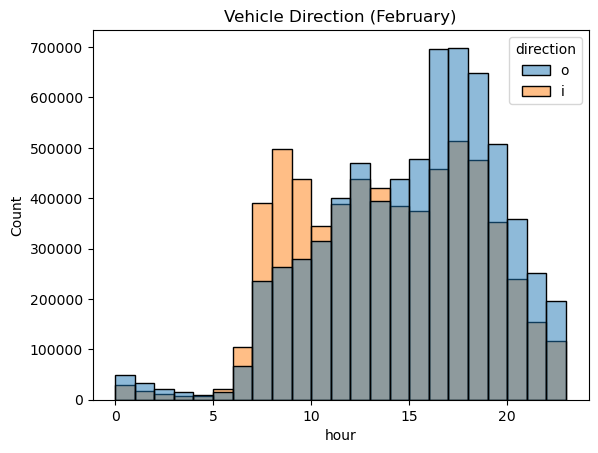

In [320]:
sns.histplot(data = df2, x = 'hour', binwidth=1, hue = 'direction')
plt.title('Vehicle Direction (February)')
plt.show()

In [321]:
df3 = df2.sort_values(['plate_number','day', 'hour', 'min', 'sec'])

In [322]:
df3

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
33392721,0,car,False,i,1,5,9,42,6
30306146,0,car,False,i,1,16,11,51,6
8775681,0,car,False,o,4,24,15,20,43
8699334,0,car,False,o,4,24,15,21,33
32243140,0,car,False,i,1,29,10,56,54
...,...,...,...,...,...,...,...,...,...
29560398,992182,car,False,o,1,11,10,11,35
29560399,992182,car,False,o,1,11,10,11,35
3584945,992183,car,False,i,5,8,9,55,7
3585412,992183,car,False,o,1,8,9,58,25


In [323]:
enterdf = df3.loc[(df3['plate_number'].shift(-1)==df3['plate_number'])&(df3['direction'] == 'i')&(df3['direction'].shift(-1) == 'o')].reset_index()
enterdf['gate_id'] = enterdf['gate_id'].map(gatedic)
enterdf.head()

,index,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,30306146,0,car,False,i,Main Gate,16,11,51,6
1,31644802,1,car,False,i,Agriculture,26,11,4,44
2,25507256,144,motorcycle,False,i,Main Gate,12,12,55,20
3,33745482,162,car,False,i,Engineer Gate,7,9,25,55
4,25414134,162,car,False,i,Main Gate,12,9,12,12


In [324]:
exitdf = df3.loc[(df3['plate_number'].shift(1)==df3['plate_number'])&(df3['direction'].shift(1) == 'i')&(df3['direction'] == 'o')].reset_index()
exitdf['gate_id'] = exitdf['gate_id'].map(gatedic)
exitdf.head()

,index,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,8775681,0,car,False,o,Agriculture,24,15,20,43
1,32346330,1,car,False,o,Agriculture,30,13,9,17
2,25463722,144,motorcycle,False,o,Agriculture,12,16,6,36
3,33939061,162,car,False,o,Main Gate,8,9,6,47
4,25531947,162,car,False,o,Main Gate,12,15,19,24


In [325]:
entrydf = enterdf.loc[:,['plate_number','type','is_registered','day','hour','min','sec']]
entrydf['gate_in'] = enterdf.loc[:,'gate_id']
entrydf['gate_out'] = exitdf.loc[:,'gate_id']

In [326]:
A = enterdf[['day','hour','min','sec']]
B = exitdf[['day','hour','min','sec']]
diff = B-A

In [327]:
entrydf['timediff'] = diff['day']*24 + diff['hour']+ diff['min']/60 + diff['sec']/3600
entrydf['timediff_s'] = diff['day']*24*3600 + diff['hour']*3600+ diff['min']*60 + diff['sec']

In [328]:
filtered_entrydf = entrydf[entrydf['timediff'] > 0]

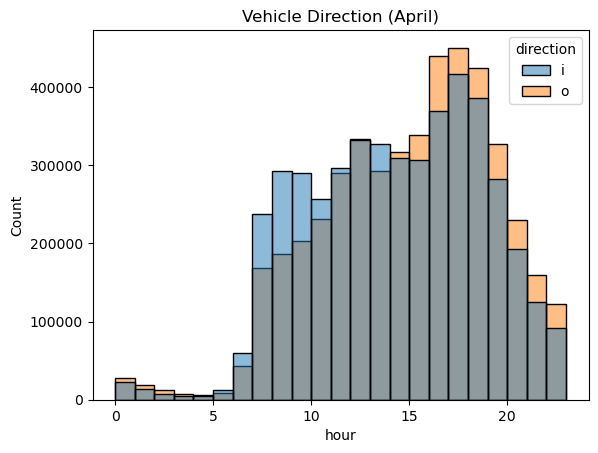

In [329]:
sns.histplot(data = pd.concat([enterdf,exitdf],axis = 0), x = 'hour', binwidth=1, hue = 'direction')
plt.title('Vehicle Direction (April)')
plt.show()

[]

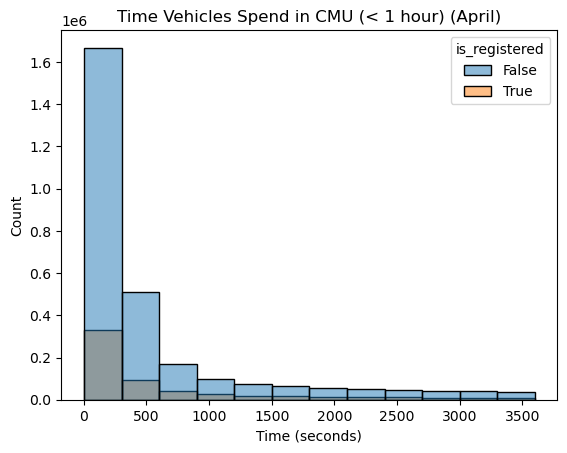

In [330]:
sns.histplot(data = filtered_entrydf[(filtered_entrydf['timediff'] < 1)], x = 'timediff_s',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU (< 1 hour) (April)')
plt.xlabel('Time (seconds)')
plt.plot()

[]

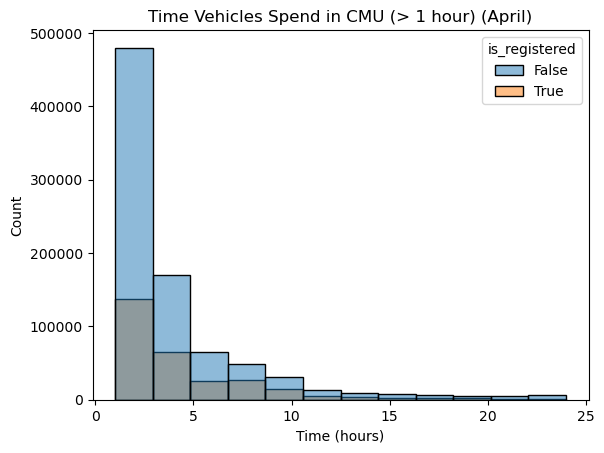

In [331]:
sns.histplot(data = filtered_entrydf[(filtered_entrydf['timediff'] > 1) & (filtered_entrydf['timediff'] < 24)], x = 'timediff',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU (> 1 hour) (April)')
plt.xlabel('Time (hours)')
plt.plot()

[]

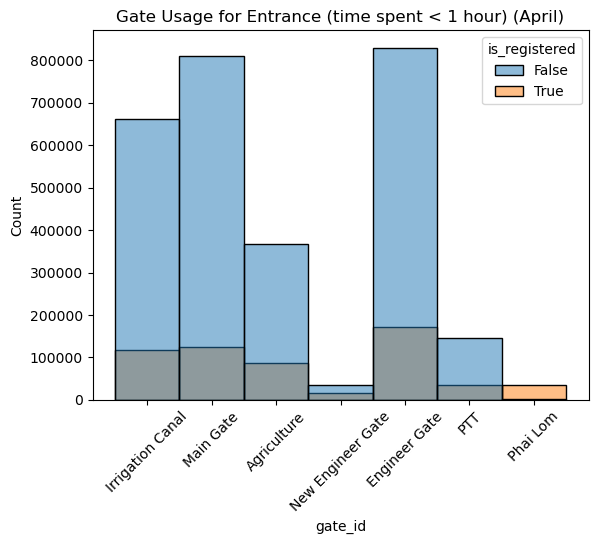

In [332]:
plot = sns.histplot(data = enterdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Entrance (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

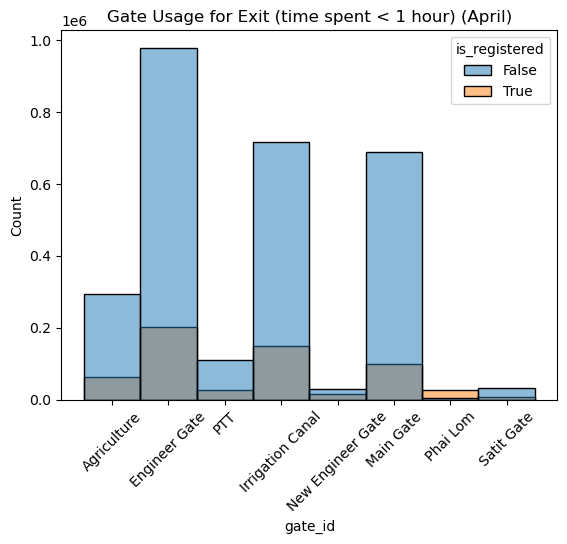

In [333]:
plot = sns.histplot(data = exitdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Exit (time spent < 1 hour) (April)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

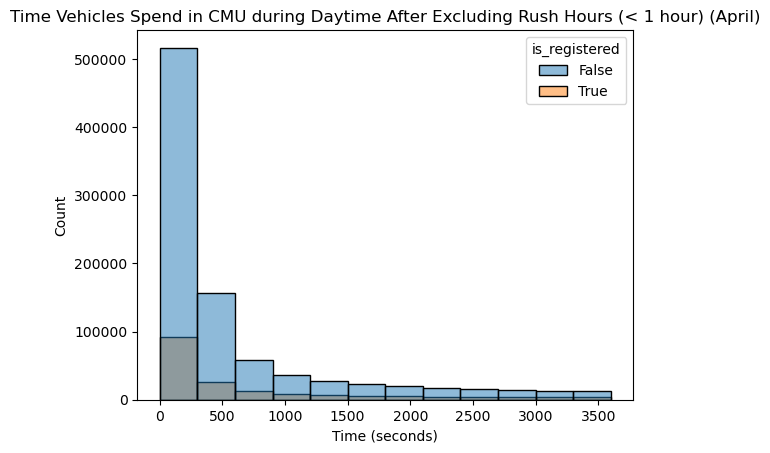

In [334]:
sns.histplot(data = entrydf[(entrydf['timediff'] < 1)&(entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'timediff_s',hue = 'is_registered', bins = 12)
plt.title('Time Vehicles Spend in CMU during Daytime After Excluding Rush Hours (< 1 hour) (April)')
plt.xlabel('Time (seconds)')
plt.plot()

In [ ]:
months = ['January','February','March','April','May','June']
df['month']=pd.Categorical(df['month'],months)

[]

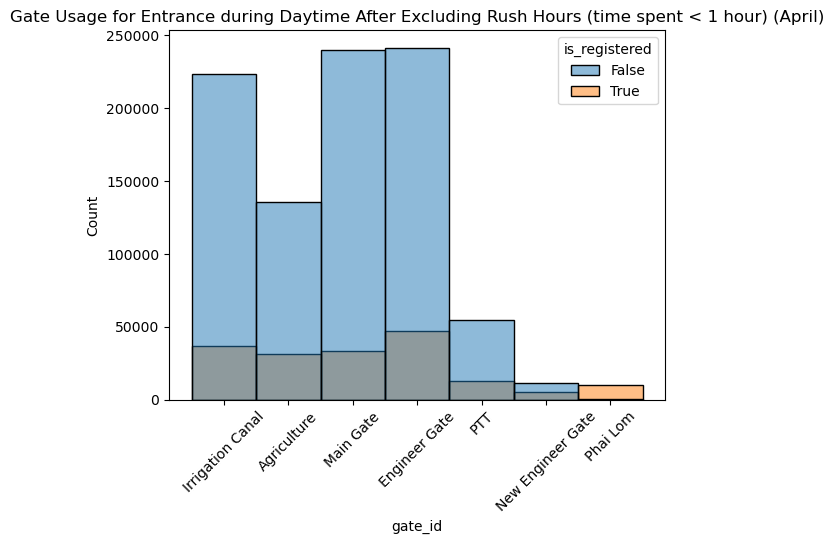

In [335]:
plot = sns.histplot(data = enterdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Entrance during Daytime After Excluding Rush Hours (time spent < 1 hour)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

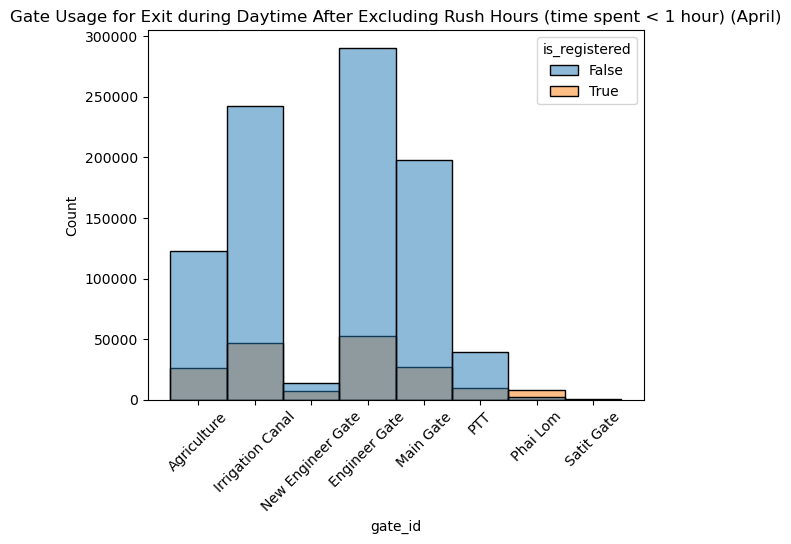

In [336]:
plot = sns.histplot(data = exitdf[(entrydf['timediff'] < 1) & (entrydf['timediff'] > 0)&(exitdf['hour'] > 9)&(exitdf['hour'] < 15)], x = 'gate_id',hue = 'is_registered', bins = 12)
plt.title('Gate Usage for Exit during Daytime After Excluding Rush Hours (time spent < 1 hour)')
plt.setp(plot.get_xticklabels(), rotation=45)
plt.plot()

[]

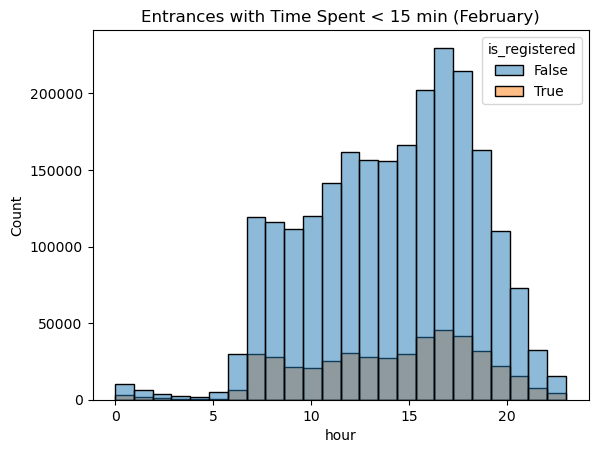

In [337]:
plot = sns.histplot(data = enterdf[(entrydf['timediff_s'] < 900) & (entrydf['timediff'] > 0)], x = 'hour',hue = 'is_registered', bins = 24)
plt.title('Entrances with Time Spent < 15 min (February)')
plt.plot()

[]

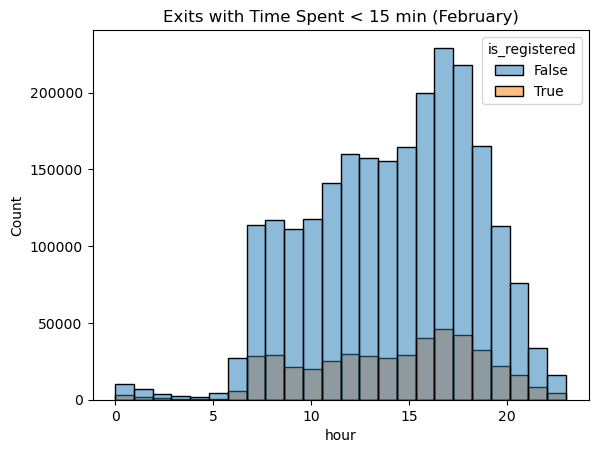

In [338]:
plot = sns.histplot(data = exitdf[(entrydf['timediff_s'] < 900) & (entrydf['timediff'] > 0)], x = 'hour',hue = 'is_registered', bins = 24)
plt.title('Exits with Time Spent < 15 min (February)')
plt.plot()

[]

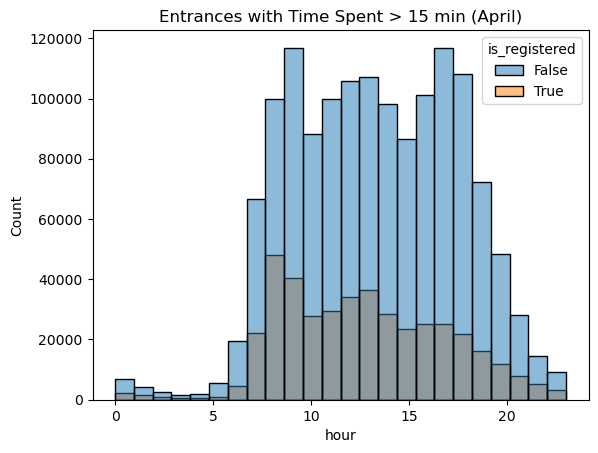

In [339]:
plot = sns.histplot(data = enterdf[(entrydf['timediff_s'] > 900) & (entrydf['timediff'] > 0)], x = 'hour',hue = 'is_registered', bins = 24)
plt.title('Entrances with Time Spent > 15 min (April)')
plt.plot()

[]

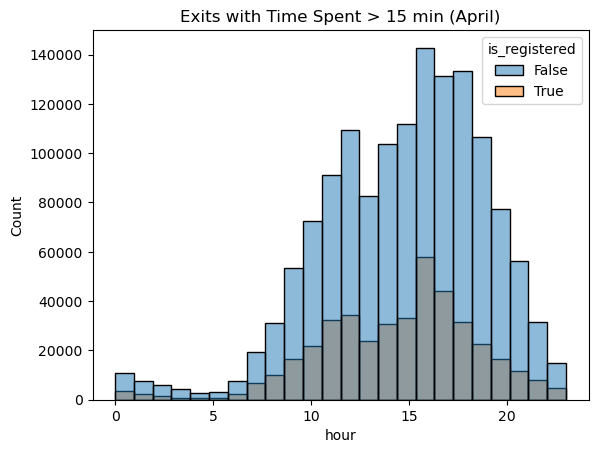

In [340]:
plot = sns.histplot(data = exitdf[(entrydf['timediff_s'] > 900) & (entrydf['timediff'] > 0)], x = 'hour',hue = 'is_registered', bins = 24)
plt.title('Exits with Time Spent > 15 min (April)')
plt.plot()